In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # ignore info and warnings

from utils import DatasetWrapper, ModelWrapper

/home/nic/.local/lib/python3.8/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.5.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [2]:
lr = 1e-3
epochs = 20
dataset = DatasetWrapper(dataset_path='/data/train', img_size=224, batch_size=64)

In [3]:
dataset.make_datagens(augment=True, hsv_mask=True)
model = ModelWrapper(dataset)
model.make_model(figname='hsv_augmented')
model.model.load_weights(os.path.join(model.weightdir, model.figname + '.h5'))

Found 3330 images belonging to 12 classes.
Found 1420 images belonging to 12 classes.


In [4]:
import matplotlib.pyplot as plt
import numpy as np

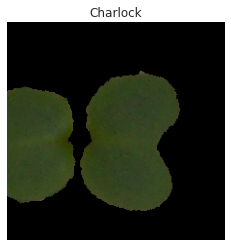

In [5]:
for i, (x, y) in enumerate(dataset.valid_generator):
    if i == 1: # reproducibility for nice charlock image
        break
aug_image = x[:1]
mapping = {v: k for k, v in dataset.valid_generator.class_indices.items()}
plt.title(mapping.get(np.argmax(y[:1]))); plt.axis('off')
plt.imshow(dataset.undo_preprocess(aug_image[0].copy()))

In [6]:
from utils import save_activations

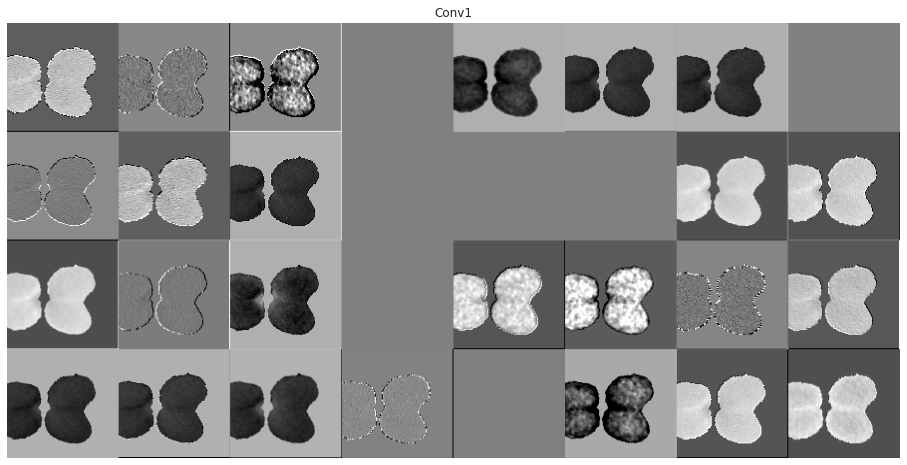

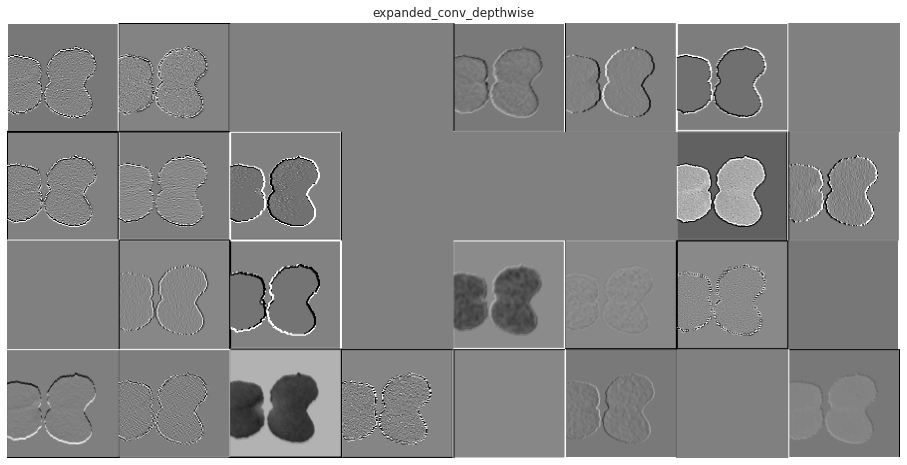

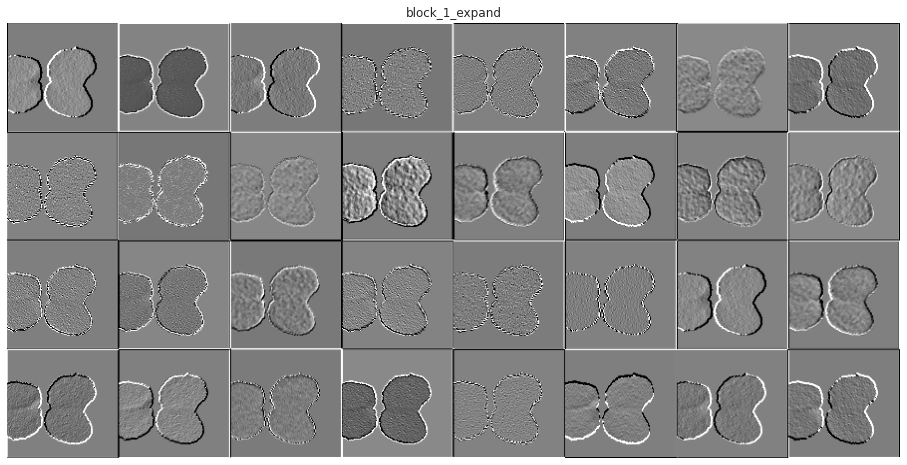

In [7]:
save_activations(model.model, aug_image, 'results/activations', num_layers=3)

In [8]:
from utils import save_gradcam

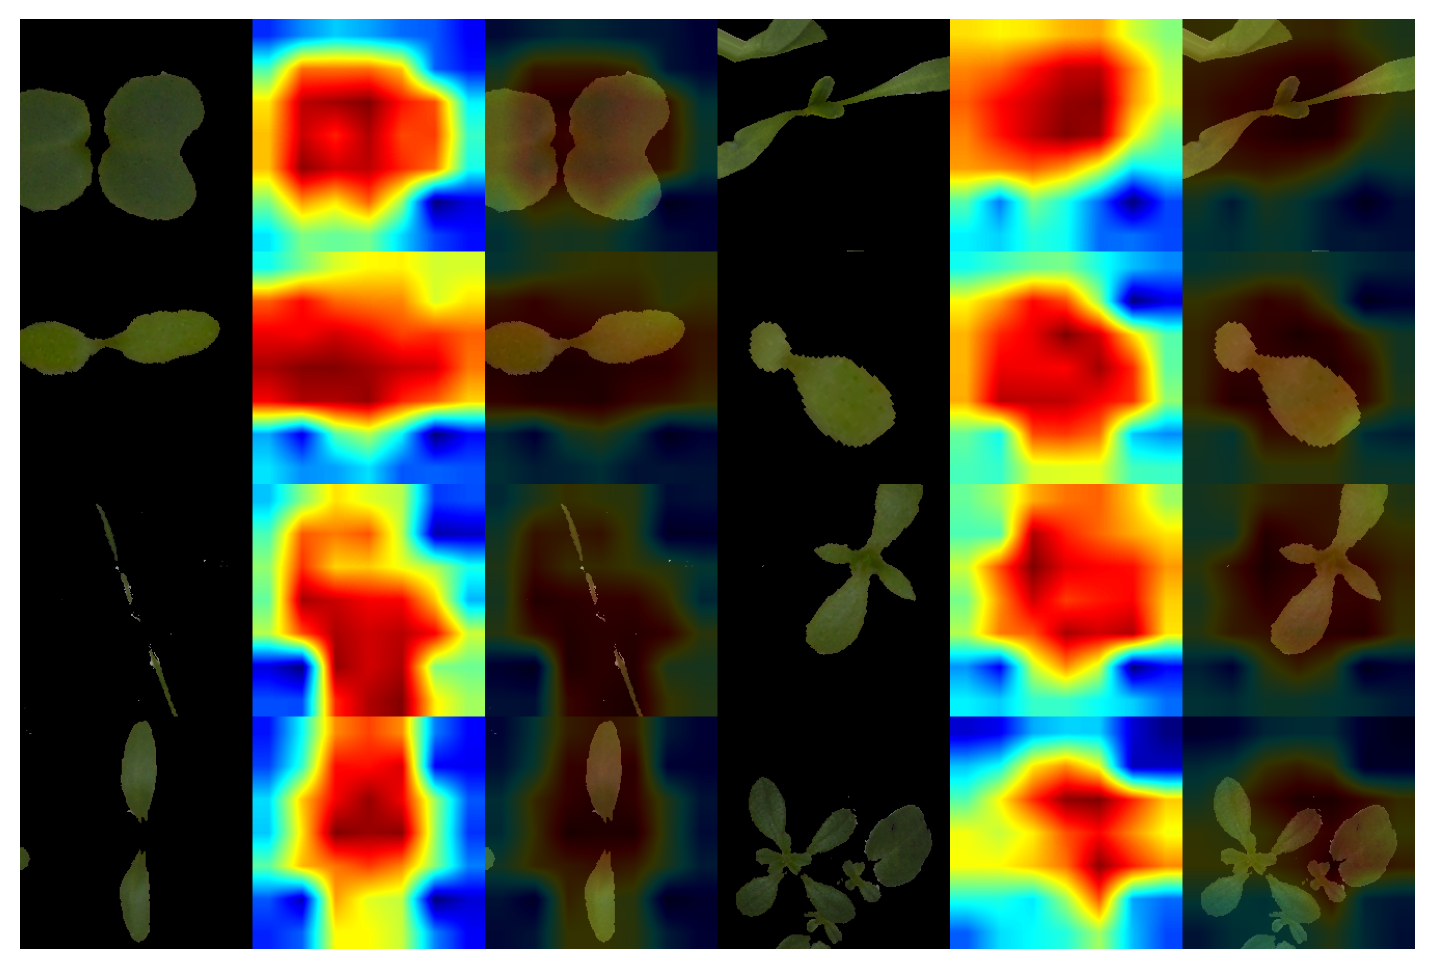

In [9]:
save_gradcam(model.model, x[:8], 'results/gradcam', dataset.undo_preprocess)